# Group Project Thicket Python Code

In [63]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [64]:
tk = th.Thicket.from_caliperreader(glob("merge_mpi/merge-p*-random.cali"))

In [65]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              132818521     1   
                                                  216932751     1   
                                                  346481687     1   
                                                  602600885     1   
                                                  991347598     1   
                                                  1451808986    1   
                                                  1461607898    1   
                                                  1531148616    1   
                                                  1608676321    1   
                                                  1715083750    1   
                                                  1980696927    1   
                                                  1997353997    1   
                                                  2520756104    1   
                                                  3002140804    1   
                                                  3561351425    1   
{'name': 'comm', 'type': 'function'}              132818521     3   
                                                  216932751     3   
                                                  346481687     3   
                                                  602600885     3   
                                                  991347598     3   
                                                  1451808986    3   
                                                  1461607898    3   
                                                  1531148616    3   
                                                  1608676321    3   
                                                  1715083750    3   
                                                  1980696927    3   
                                                  1997353997    3   
                                                  2520756104    3   
                                                  3002140804    3   
                                                  3561351425    3   
{'name': 'comm_large', 'type': 'function'}        132818521     4   
                                                  216932751     4   
                                                  346481687     4   
                                                  602600885     4   
                                                  991347598     4   
                                                  1451808986    4   
                                                  1461607898    4   
                                                  1531148616    4   
                                                  1608676321    4   
                                                  1715083750    4   
                                                  1980696927    4   
                                                  1997353997    4   
                                                  2520756104    4   
                                                  3002140804    4   
                                                  3561351425    4   
{'name': 'MPI_Gather', 'type': 'function'}        132818521     8   
                                                  216932751     8   
                                                  346481687     8   
                                                  602600885     8   
                                                  991347598     8   
                                                  1451808986    8   
                                                  1461607898    8   
                                                  1531148616    8   
                                                  1608676321    8   
                                                  1715083750    8   
                                                  1980696927    8   
                                                  1997353997

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [66]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,user,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,
132818521,2.11.0-dev,18,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge-p18-a1048576-random.cali,true,andrew.hooper14,1700072413,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 1048576, 1]",c,Merge_Sort,MPI,Int,4,1048576,random,18,11,"Online, AI"
216932751,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge-p64-a1048576-random.cali,true,andrew.hooper14,1700072440,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 1048576, 1]",c,Merge_Sort,MPI,Int,4,1048576,random,64,11,"Online, AI"
346481687,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge-p128-a1048576-random.cali,true,andrew.hooper14,1700072440,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 1048576, 1]",c,Merge_Sort,MPI,Int,4,1048576,random,128,11,"Online, AI"
602600885,2.11.0-dev,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge-p256-a16777216-random.cali,true,andrew.hooper14,1700072689,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 16777216, 1]",c,Merge_Sort,MPI,Int,4,16777216,random,256,11,"Online, AI"
991347598,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge-p64-a65536-random.cali,true,andrew.hooper14,1700072201,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 65536, 1]",c,Merge_Sort,MPI,Int,4,65536,random,64,11,"Online, AI"
1451808986,2.11.0-dev,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge-p256-a1048576-random.cali,true,andrew.hooper14,1700072442,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 1048576, 1]",c,Merge_Sort,MPI,Int,4,1048576,random,256,11,"Online, AI"
1461607898,2.11.0-dev,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge-p256-a65536-random.cali,true,andrew.hooper14,1700072225,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 65536, 1]",c,Merge_Sort,MPI,Int,4,65536,random,256,11,"Online, AI"
1531148616,2.11.0-dev,18,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge-p18-a65536-random.cali,true,andrew.hooper14,1700072193,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 65536, 1]",c,Merge_Sort,MPI,Int,4,65536,random,18,11,"Online, AI"
1608676321,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,merge-p32-a16777216-random.cali,true,andrew.hooper14,1700072686,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort, 16777216, 1]",c,Merge_Sort,MPI,Int,4,16777216,random,32,11,"Online, AI"


In [67]:
gb = tk.groupby("InputSize")

3  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b52dcfef730>, 1048576: <thicket.thicket.Thicket object at 0x2b52d46652e0>, 16777216: <thicket.thicket.Thicket object at 0x2b52d72d8940>}


Compose these 3 groups column-wise to get a holistic view of the data

In [68]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [69]:
ctk.dataframe

65536  \
                                                              nid   
node                                              num_procs         
{'name': 'main', 'type': 'function'}              18            1   
                                                  32            1   
                                                  64            1   
                                                  128           1   
                                                  256           1   
{'name': 'comm', 'type': 'function'}              18            3   
                                                  32            3   
                                                  64            3   
                                                  128           3   
                                                  256           3   
{'name': 'comm_large', 'type': 'function'}        18            4   
                                                  32            4   
                                                  64            4   
                                                  128           4   
                                                  256           4   
{'name': 'MPI_Gather', 'type': 'function'}        18            8   
                                                  32            8   
                                                  64            8   
                                                  128           8   
                                                  256           8   
{'name': 'MPI_Scatter', 'type': 'function'}       18            5   
                                                  32            5   
                                                  64            5   
                                                  128           5   
                                                  256           5   
{'name': 'comp', 'type': 'function'}              18            6   
                                                  32            6   
                                                  64            6   
                                                  128           6   
                                                  256           6   
{'name': 'comp_large', 'type': 'function'}        18            9   
                                                  32            9   
                                                  64            9   
                                                  128           9   
                                                  256           9   
{'name': 'comp_small', 'type': 'function'}        18            7   
                                                  32            7   
                                                  64            7   
                                                  128           7   
                                                  256           7   
{'name': 'correctness_check', 'type': 'function'} 18           10   
                                                  32           10   
                                                  64           10   
                                                  128          10   
                                                  256          10   
{'name': 'data_init', 'type': 'function'}         18            2   
                                                  32            2   
                                                  64            2   
                                                  128           2   
                                                  256           2   

                                                                            \
                                                              spot.channel   
node                                              num_procs                  
{'name': 'main', 'type': 'function'}              18         regionprofile   
                                                  32         regionprofile   
            

Perform pandas operations to get the table in a desirable format for plotting

In [70]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (65536, "nid"), (1048576, "nid"), (16777216, "nid"), (65536, "spot.channel"), (1048576, "spot.channel"), (16777216, "spot.channel"), (65536, "Min time/rank"), (1048576, "Min time/rank"), (16777216, "Min time/rank"), (65536, "Max time/rank"), (1048576, "Max time/rank"), (16777216, "Max time/rank"), (65536, "Avg time/rank"), (1048576, "Avg time/rank"), (16777216, "Avg time/rank"), (65536, "Variance time/rank"), (1048576, "Variance time/rank"), (16777216, "Variance time/rank")], axis=1)




ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
# Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [71]:
ctk.dataframe

65536      1048576      16777216
                              Total time   Total time    Total time
name              num_procs                                        
main              18           19.803593    22.182712     87.647424
                  32          301.919342   428.123610    209.001987
                  64          609.181926   193.403725    943.477212
                  128         685.437435   765.737242  10688.141468
                  256        2731.326118  3179.974100  51915.329966
comm              18            2.751366     3.840375     36.874848
                  32            1.877217    11.917658     99.655998
                  64           14.429006    31.544276    670.788963
                  128          60.532873   142.264793   9855.398529
                  256         112.566195   591.194545  48932.960453
comm_large        18            2.748657     3.839662     36.870575
                  32            1.876048    11.915663     99.654629
                  64           14.426729    31.541921    670.786504
                  128          60.393784   142.260251   9855.200685
                  256         112.234152   591.131736  48932.633903
MPI_Gather        18            0.102986     0.550839      2.550722
                  32            0.119986     0.242915      3.168571
                  64            1.627802     3.730125    271.094082
                  128          28.538028    12.231739   8246.084352
                  256          35.097668    68.842725  42436.724575
MPI_Scatter       18            2.644921     3.288022     34.318878
                  32            1.754681    11.671407     96.460406
                  64           12.796148    27.808741    399.689215
                  128          31.849116   130.022480   1609.109426
                  256          77.124588   522.083587   6495.704470
comp              18            0.081239     1.536624     31.215884
                  32            0.077683     2.267327     52.579231
                  64            0.141282     3.470996    104.420936
                  128           0.301718     6.376210    205.715606
                  256           0.642981    13.172896    397.772726
comp_large        18            0.048793     0.791043     14.396120
                  32            0.063289     1.344115     24.118517
                  64            0.132028     2.828573     50.988892
                  128           0.258736     6.061261    107.665124
                  256           0.631012    12.814220    227.290103
comp_small        18            0.032136     0.744994     16.819067
                  32            0.013860     0.922302     28.459601
                  64            0.008276     0.641143     53.429843
                  128           0.008047     0.312920     97.916338
                  256           0.008307     0.354858    170.354297
correctness_check 18            0.017283     0.028679      0.248509
                  32            0.000429     0.014223      0.393886
                  64            0.000435     0.063255      0.767327
                  128           0.000481     0.063280      1.506732
                  256           0.000560     0.210657      3.198890
data_init         18            0.063627     0.138153      1.884427
                  32            0.001534     0.237006      3.049327
                  64            0.035561     0.411634      6.032625
                  128           0.001526     0.701674     11.907562
                  256           0.141337     1.475150     23.997344

In [72]:
# var = ctk.dataframe.loc["comp_large", 1024]
# ctk.dataframe.loc["comp_large", 1024]

In [73]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = ctk.dataframe.columns.tolist()

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [74]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [75]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [76]:
ctk.dataframe.loc["main"]

,65536,1048576,16777216
,Total time,Total time,Total time
num_procs,,,
18,19.803593,22.182712,87.647424
32,301.919342,428.123610,209.001987
64,609.181926,193.403725,943.477212
128,685.437435,765.737242,10688.141468
256,2731.326118,3179.974100,51915.329966


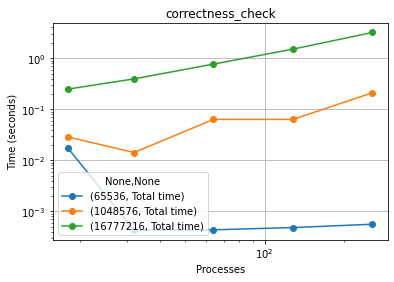

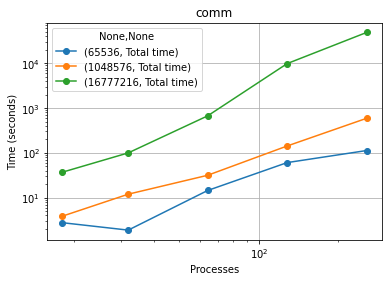

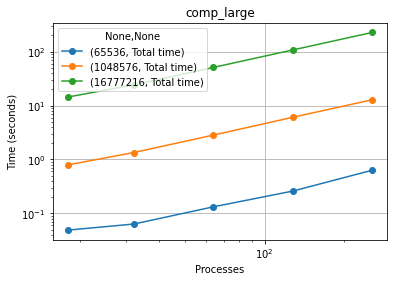

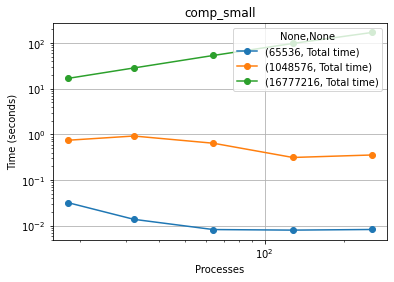

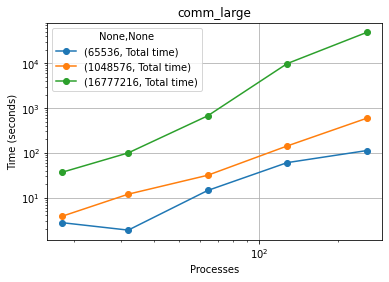

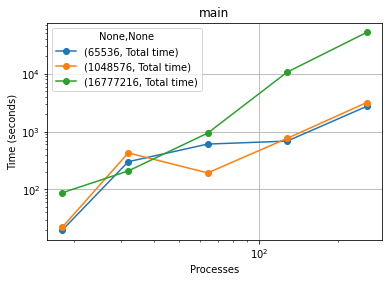

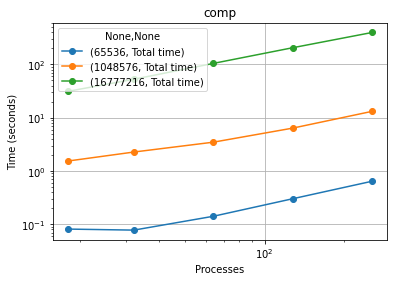

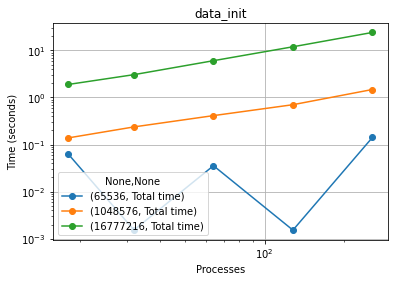

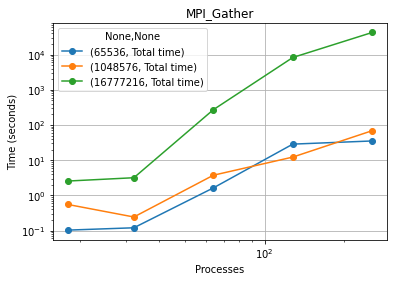

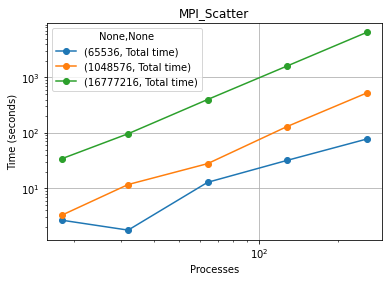

In [77]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Processes",
        ylabel="Time (seconds)",
        loglog=True
    )

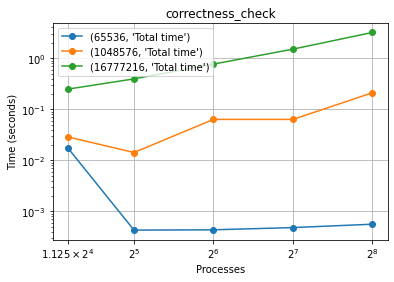

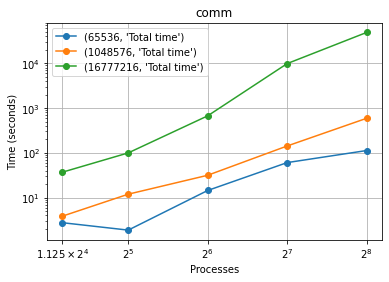

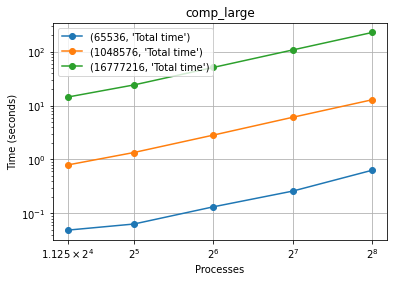

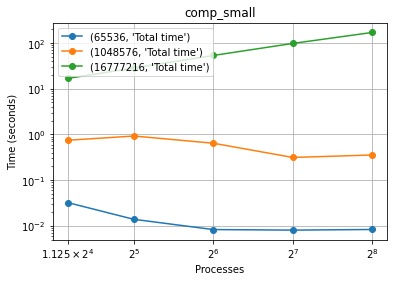

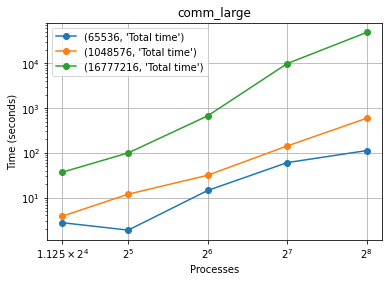

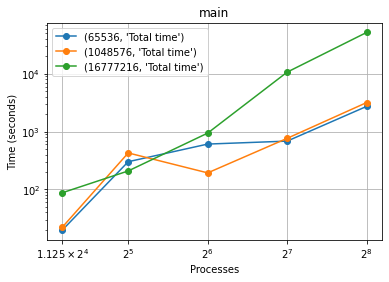

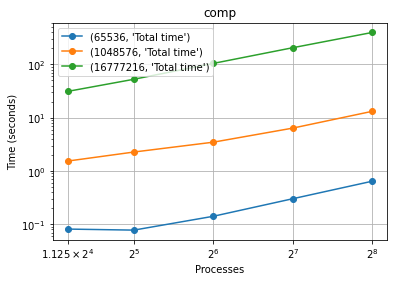

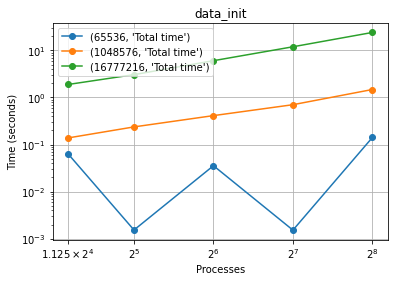

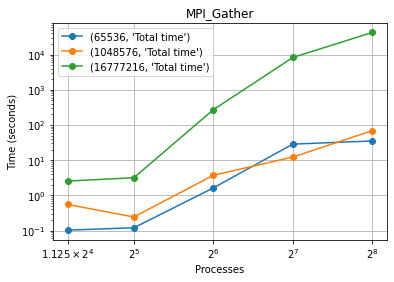

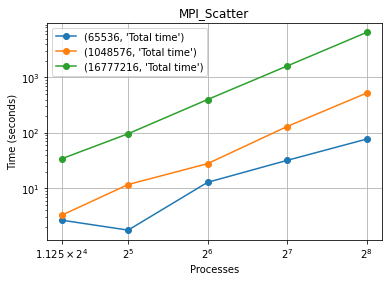

In [78]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Processes",
        ylabel="Time (seconds)",
    )

## Speedup

In [79]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )

KeyError: 1